In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import MeCab
from scipy.stats import dirichlet
import matplotlib.pyplot as plt

from Latent_Dirichlet_Allocation import Mixture_Of_Unigram_Models_In_EM, Mixture_Of_Unigram_Models_In_VB, Mixture_Of_Unigram_Models_In_CGS
from Latent_Dirichlet_Allocation import LDA_In_EM

%matplotlib inline

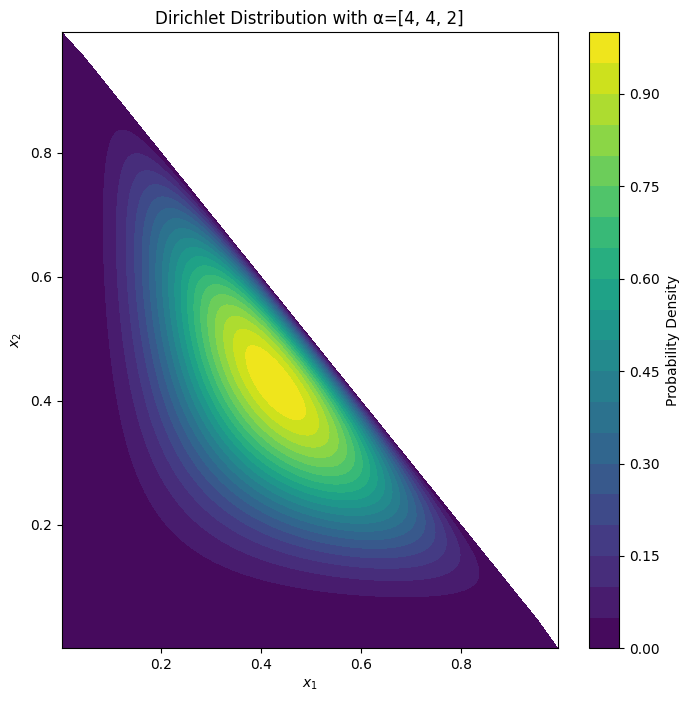

In [2]:
# Example usage
points = 200
alpha = [4, 4, 2]  # Concentration parameters for the Dirichlet distribution
# Create a triangular grid
x = np.linspace(0.001, 0.999, points)
y = np.linspace(0.001, 0.999, points)
X, Y = np.meshgrid(x, y)
    
# Only keep points within the simplex
valid = (X + Y < 1)
X_valid = X[valid]
Y_valid = Y[valid]
Z_valid = 1 - X_valid - Y_valid  # Third dimension in the simplex

# Compute Dirichlet density
samples = np.vstack([X_valid, Y_valid, Z_valid]).T
pdf_values = dirichlet.pdf(samples.T, alpha)

# Normalize for better visualization
pdf_values /= pdf_values.max()

# Plot
plt.figure(figsize=(8, 8))
plt.tricontourf(X_valid, Y_valid, pdf_values, levels=20, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(f"Dirichlet Distribution with α={alpha}")
plt.show()

In [3]:
df_csv = pd.read_csv('csv_data/sample_data.csv')
df_csv

,Character
0,事例のような解析を具体的にどのようにすれば自分でもできるかの補足説明
1,オンラインとのハイブリッド（ZOOMでは公開可能な資料のみを流す、顔を見せる等の制約付き）。
2,特にはないですが、もっとアップデート内容を聞きたかったです！ みなさんの発表も参考になりました。
3,頻度を増やして欲しい
4,発表者の数が多くて長かった。ただ、内容はどれも興味深いものでした。
5,発表中に他のページが見たいため、資料を事前共有して欲しい。
6,初めての参加でしたが、とてもうまく回されていたと思います。リモートでの複数参加はファシリテー...
7,次の時間に予定があったので時間通りに終わると助かります。オンライン開催はチャットの反応も面白...
8,満足でしたので、パッとは思いつかなかったです。
9,もしもまた日中にオンライン開催される場合は、時間を少し短くして開催頻度を上げていただくと業務...


In [4]:
wakati = MeCab.Tagger("-Owakati")

work_set = set()
for i, row in df_csv.iterrows():
    for word in wakati.parse(row['Character']).split():
        work_set.add(word)

df_observed = pd.DataFrame([], columns=list(work_set))
for i, row in df_csv.iterrows():
	observed = {word: 0 for word in work_set}
	for word in wakati.parse(row['Character']).split():
		observed[word] += 1
	df_observed = pd.concat([df_observed, pd.DataFrame(pd.Series(observed)).T], ignore_index=True)
 
df_observed

,楽しかっ,複数,自分,どの,発表,たい,ただ,思い,なり,（,...,見せる,を,初めて,頻度,日中,アップデート,も,よう,共有,欲しい
0,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,2,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,2,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
6,0,1,0,0,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,1,0,1,0,0,0


In [ ]:
model = Mixture_Of_Unigram_Models_In_EM(df_csv, topic_num=3)
model.fit()

print(f'topic_θ:    {model.topic_θ}')
print(f'word_distr: {model.word_distr}')

In [ ]:
model = Mixture_Of_Unigram_Models_In_VB(df_csv, topic_num=3)
model.fit()

print(f'topic_θ:    {model.topic_α_k / np.sum(model.topic_α_k)}')
print(f'word_distr: {model.word_β_k  / np.sum(model.word_β_k)}')

In [ ]:
model = Mixture_Of_Unigram_Models_In_CGS(df_csv, topic_num=5)
model.fit()

print(f'topic_θ:    {model.topic_α_k / np.sum(model.topic_α_k)}')
print(f'word_distr: {model.word_β_k  / np.sum(model.word_β_k)}')

In [5]:
model = LDA_In_EM(df_csv, topic_num=5)
model.fit()

print(f'topic_θ: {model.topic_θ}')
print(f'word_Φ:  {model.word_Φ}')

学習回数：0
topic_θ: [[0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000]
 [9.84397303e-011 0.00000000e+000 1.00000000e+000 0.00000000e+000
  7.69299591e-134]
 [0.00000000e+000 5.99961411e-001 4.16095339e-019 0.00000000e+000
  4.00038589e-001]
 [1.45702711e-011 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.00000000e+000]
 [0.00000000e+000 5.05486843e-041 1.47261046e-025 0.00000000e+000
  1.00000000e+000]
 [0.00000000e+000 2.41538569e-035 9.99514977e-001 0.00000000e+000
  4.85022592e-004]
 [2.47440569e-018 1.00000000e+000 0.00000000e+000 0.00000000e+000
  6.50492466e-201]
 [1.00000000e+000 0.00000000e+000 7.10010335e-014 0.00000000e+000
  4.65148978e-182]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 3.17527868e-280
  0.00000000e+000]
 [9.99999988e-001 4.60297681e-010 1.32124607e-016 0.00000000e+000
  1.15410684e-008]]
word_Φ:  [[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 9.52380959e-002 9.523809

In [6]:
pd_θ, pd_Φ = model.stats_info()
pd_θ

,トピック1,トピック2,トピック3,トピック4,トピック5
文書1,0.0,0.0,0.0000,1.0,0.0000
文書2,0.0,0.0,1.0000,0.0,0.0000
文書3,0.0,0.6,0.0000,0.0,0.4000
文書4,0.0,0.0,0.0000,0.0,1.0000
文書5,0.0,0.0,0.0000,0.0,1.0000
文書6,0.0,0.0,0.9995,0.0,0.0005
文書7,0.0,1.0,0.0000,0.0,0.0000
文書8,1.0,0.0,0.0000,0.0,0.0000
文書9,0.0,1.0,0.0000,0.0,0.0000
文書10,1.0,0.0,0.0000,0.0,0.0000


In [7]:
pd_Φ

,単語1:事例,単語2:解析,単語3:具体,単語4:自分,単語5:補足,単語6:説明,単語7:オン,単語8:ライン,単語9:ハイブリッド,単語10:ZOOM,...,単語36:予定,単語37:通り,単語38:開催,単語39:チャット,単語40:反応,単語41:満足,単語42:日中,単語43:場合,単語44:業務,単語45:合間
トピック1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.523810e-02,9.523810e-02,4.519590e-105,8.550664e-105,...,4.761905e-02,4.761905e-02,1.428571e-01,4.761905e-02,4.761905e-02,0.000000e+00,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
トピック2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.770572e-84,2.770674e-84,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,5.321830e-85,0.000000e+00,0.000000e+00,1.000019e-01,4.036386e-91,4.693057e-91,1.882012e-91,2.202372e-91
トピック3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.668176e-02,6.668176e-02,6.668176e-02,6.668176e-02,...,2.770255e-97,1.091952e-97,5.017675e-105,6.986131e-97,1.039735e-96,0.000000e+00,7.764844e-137,3.455642e-137,2.661714e-137,3.657671e-137
トピック4,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.292131e-281,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
トピック5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.459033e-49,6.841061e-48,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,4.940902e-48,0.000000e+00,0.000000e+00,0.000000e+00,1.105641e-45,1.192068e-46,4.395971e-46,2.507638e-46
